In [1]:
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import datetime as dt

from dateutil import parser
from dateutil import tz


C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Cleaned-Coopersburg-2022-03-28 10_32_08.560024.csv')

In [3]:
local_tz = tz.gettz('America/New_York') # local time zone
data['time'] = data['DateTime'].apply(lambda x: parser.parse(x).astimezone(local_tz))

C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be re

C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


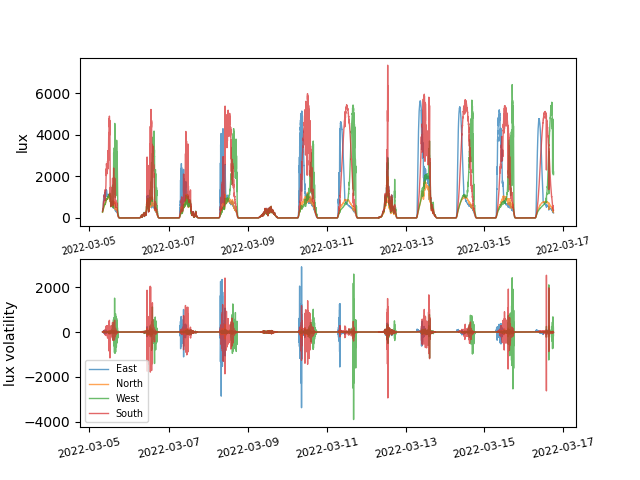

In [4]:
start_time = dt.datetime(2022, 3, 5, 8, 0, 0, 0, local_tz)
end_time = dt.datetime(2022, 3, 16, 18, 0, 0, 0, local_tz)
lux = data[((start_time < data.time) & (data.time < end_time))].reset_index()

fig, ax = plt.subplots(2)
for facade in ['East', 'North', 'West', 'South']:
    ax[0].plot(lux.time, lux[facade], linewidth=1, alpha=.7, label=facade)
    ax[1].plot(lux.time[1:], np.diff(lux[facade]), linewidth=1, alpha=.7, label=facade)

for i in[0,1]:
    ax[i].tick_params(axis='x', labelrotation=12, labelsize='x-small')

# ax[0].set_ylabel('lux')
# ax[1].set_ylabel('lux volatility')
plt.gca().tick_params(axis='x', which='major', labelsize=8)
plt.legend(fontsize='x-small')
plt.show()


In [62]:
start_time = dt.datetime(2022, 3, 5, 8, 0, 0, 0, local_tz)
end_time = dt.datetime(2022, 3, 16, 18, 0, 0, 0, local_tz)
lux = data[((start_time < data.time) & (data.time < end_time))].reset_index()

In [5]:
lux_a = np.array(lux[['East', 'West', 'North', 'South']])
lux_gap = lux_a.max(axis=1)-lux_a.min(axis=1)
lux_max = lux_a.max(axis=1)

C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cmchen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be re

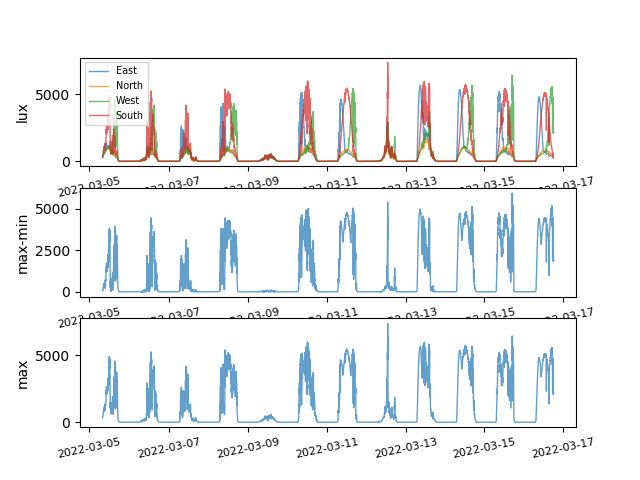

In [6]:
fig, ax = plt.subplots(3)
for facade in ['East', 'North', 'West', 'South']:
    ax[0].plot(lux.time, lux[facade], linewidth=1, alpha=.7, label=facade)
ax[1].plot(lux.time, lux_gap, linewidth=1, alpha=.7, label=facade)
ax[2].plot(lux.time, lux_max, linewidth=1, alpha=.7, label=facade)

for i in [0,1,2]:
#     ax[i].xaxis.set_ticklabels([]) # supress xticks on 1st subplot
    ax[i].tick_params(axis='x', labelrotation=12, labelsize=8)
#     ax[i].set_xticklabels(xvalues, fontsize=16,)

# ax[0].set_ylabel('lux')
# ax[1].set_ylabel('max-min')
# ax[2].set_ylabel('max')
# ax[0].legend(fontsize='x-small')
plt.gca().tick_params(axis='x', which='major', labelsize=8)
# plt.legend(fontsize='x-small')
plt.show()
